# **Introduction and Business Context**

Welcome to this comprehensive Exploratory Data Analysis (EDA) journey delving into the intricate landscape of data science salaries. In the dynamic realm of tech-driven careers, understanding the nuances of compensation is pivotal for both aspiring and seasoned data enthusiasts. As we embark on this analytical voyage, our focus centers on three key questions designed to unravel the complexities of data science salaries:

* **Experience and Compensation**: How does the number of years of experience correlate with salaries in the data science domain? We'll explore whether there's a linear progression or if certain experience milestones significantly influence compensation.

* **Employment Type Impact**: What is the distribution of salaries across different employment types? By dissecting salaries based on employment types, we aim to uncover patterns that illuminate whether specific work arrangements correlate with distinct salary ranges in the field.

* **Company Dynamics and Remote Opportunities**: How does company size impact data science salaries, and is there a correlation with the availability of remote work? We'll analyze whether larger or smaller companies offer more competitive compensation and explore how remote work options influence salary structures.



# **Understanding the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/kaggle/input/salary-data-analist/ds_salaries new.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.shape

(3755, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
#shows as well for non-numeric fields
df.describe(include=['O'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


**Attributes Description**
taking reference from notebook: https://www.kaggle.com/code/dima806/aiml-salaries-2022-2023-catboost-shap

* **work_year**:         integer for the year of the data point, ranges from 2020 to 2023
* **experience_level**:  experience level of the data point with the following categories (EN': 'Entry-level / Junior', 'MI': 'Mid-level / Intermediate', 'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director')
* **employment_type**:   categorical data of the type of employment with the following ('PT': 'Part-time', 'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance')
* **job_title**:         Job title of the data science role
* **salary**:            integer value of the salary of the role 
* **salary_currency**:   currency type of the salary
* **salary_in_usd**:     interger value of the salary of the role in USD
* **employee_residence**: Country of residence of the employee
* **remote_ratio**:       integer value fot he ratio of working arrangement with the following (0: 'No remote work (less than 20%)', 50: 'Partially remote', 100: 'Fully remote (more than 80%))
* **company_location**:   Country of residence of the company
* **company_size**:       Size of the company ('S': 'Small', 'M': 'Medium', 'L': 'Large')

# **Data Preparation**

In [7]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.loc[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [9]:
# Checking for duplicates based on multiple criteria
df.query('(work_year == 2023)& (experience_level == "SE") & (job_title == "Data Scientist") & (salary == 150000) & (remote_ratio == 0)')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
18,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
966,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
1498,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
1636,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M


In [10]:
#In this scenario the duplicated data could simply mean that there are 5 different data scientist with exactly the same attributes
# I decided not to drop the duplicates in order to preserve information linked to frequency of occurence of such data point

Performed some data transformation below with reference from https://www.kaggle.com/code/dima806/aiml-salaries-2022-2023-catboost-shap

In [11]:
#Code lifted from notebook: https://www.kaggle.com/code/dima806/aiml-salaries-2022-2023-catboost-shap

# Replace 'ML Engineer' with 'Machine Learning Engineer' in the 'job_title' column
df['job_title'].replace('ML Engineer', 'Machine Learning Engineer', inplace=True)

# Rename 'experience_level' based on a dictionary mapping
exp_dict = {'EN': 'Entry-level / Junior', 'MI': 'Mid-level / Intermediate', 'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director'}
df['experience_level'] = df['experience_level'].replace(exp_dict)

# Rename 'employment_type' based on a dictionary mapping
empl_dict = {'PT': 'Part-time', 'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance'}
df['employment_type'] = df['employment_type'].replace(empl_dict)

# Rename 'remote_ratio' based on a dictionary mapping
remote_dict = {0: 'No remote work (less than 20%)', 50: 'Partially remote', 100: 'Fully remote (more than 80%)'}
df['remote_ratio'] = df['remote_ratio'].replace(remote_dict)

# Rename 'company_size' based on a dictionary mapping
company_dict = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df['company_size'] = df['company_size'].replace(company_dict)

# Combine 'employee_residence' and 'company_location' into a new 'residence_location' column
df['residence_location'] = df['employee_residence'] + '/' + df['company_location']

# Convert 'work_year' column to strings
df['work_year'] = df['work_year'].astype(str)

# Drop unused columns
cols2drop = ['salary', 'employee_residence', 'company_location', 'salary_currency']
df = df.drop(cols2drop, axis=1)

# Display the shape of the resulting DataFrame
print(df.shape)

(3755, 8)


In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,residence_location
0,2023,Senior-level / Expert,Full-time,Principal Data Scientist,85847,Fully remote (more than 80%),Large,ES/ES
1,2023,Mid-level / Intermediate,Contract,Machine Learning Engineer,30000,Fully remote (more than 80%),Small,US/US
2,2023,Mid-level / Intermediate,Contract,Machine Learning Engineer,25500,Fully remote (more than 80%),Small,US/US
3,2023,Senior-level / Expert,Full-time,Data Scientist,175000,Fully remote (more than 80%),Medium,CA/CA
4,2023,Senior-level / Expert,Full-time,Data Scientist,120000,Fully remote (more than 80%),Medium,CA/CA


In [13]:
df['experience_level'].value_counts()

experience_level
Senior-level / Expert         2516
Mid-level / Intermediate       805
Entry-level / Junior           320
Executive-level / Director     114
Name: count, dtype: int64

In [14]:
df['employment_type'].value_counts()

employment_type
Full-time    3718
Part-time      17
Contract       10
Freelance      10
Name: count, dtype: int64

In [15]:
df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               323
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 92, dtype: int64

In [16]:
df['job_title'].unique()

array(['Principal Data Scientist', 'Machine Learning Engineer',
       'Data Scientist', 'Applied Scientist', 'Data Analyst',
       'Data Modeler', 'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Data Strategist',
       'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'Lead

In [17]:
title_mapping = {
    'Principal Data Scientist': 'Data Scientist',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Data Scientist': 'Data Scientist',
    'Applied Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Data Modeler': 'Data Engineer',
    'Research Engineer': 'Data Engineer',
    'Analytics Engineer': 'Data Engineer',
    'Business Intelligence Engineer': 'Data Engineer',
    'Data Strategist': 'Data Consultant',
    'Data Engineer': 'Data Engineer',
    'Computer Vision Engineer': 'Computer Vision Engineer',
    'Data Quality Analyst': 'Data Analyst',
    'Compliance Data Analyst': 'Data Analyst',
    'Data Architect': 'Data Architect',
    'Applied Machine Learning Engineer': 'Machine Learning Engineer',
    'AI Developer': 'AI Developer',
    'Research Scientist': 'Data Scientist',
    'Data Analytics Manager': 'Data Manager',
    'Business Data Analyst': 'Data Analyst',
    'Applied Data Scientist': 'Data Scientist',
    'Staff Data Analyst': 'Data Analyst',
    'ETL Engineer': 'Data Engineer',
    'Data DevOps Engineer': 'DevOps Engineer',
    'Head of Data': 'Head of Data',
    'Data Science Manager': 'Data Manager',
    'Data Manager': 'Data Manager',
    'Machine Learning Researcher': 'Data Scientist',
    'Big Data Engineer': 'Data Engineer',
    'Data Specialist': 'Data Consultant',
    'Lead Data Analyst': 'Data Analyst',
    'BI Data Engineer': 'Data Engineer',
    'Director of Data Science': 'Head of Data',
    'Machine Learning Scientist': 'Data Scientist',
    'MLOps Engineer': 'DevOps Engineer',
    'AI Scientist': 'Data Scientist',
    'Autonomous Vehicle Technician': 'Data Engineer',
    'Applied Machine Learning Scientist': 'Data Scientist',
    'Lead Data Scientist': 'Data Scientist',
    'Cloud Database Engineer': 'Data Engineer',
    'Financial Data Analyst': 'Data Analyst',
    'Data Infrastructure Engineer': 'Data Engineer',
    'Software Data Engineer': 'Data Engineer',
    'AI Programmer': 'AI Developer',
    'Data Operations Engineer': 'DevOps Engineer',
    'BI Developer': 'Data Analyst',
    'Data Science Lead': 'Data Scientist',
    'Deep Learning Researcher': 'Data Scientist',
    'BI Analyst': 'Data Analyst',
    'Data Science Consultant': 'Data Consultant',
    'Data Analytics Specialist': 'Data Consultant',
    'Machine Learning Infrastructure Engineer': 'Machine Learning Engineer',
    'BI Data Analyst': 'Data Analyst',
    'Head of Data Science': 'Head of Data',
    'Insight Analyst': 'Data Analyst',
    'Deep Learning Engineer': 'Machine Learning Engineer',
    'Machine Learning Software Engineer': 'Machine Learning Engineer',
    'Big Data Architect': 'Data Architect',
    'Product Data Analyst': 'Data Analyst',
    'Computer Vision Software Engineer': 'Computer Vision Engineer',
    'Azure Data Engineer': 'Data Engineer',
    'Marketing Data Engineer': 'Data Engineer',
    'Data Analytics Lead': 'Data Analyst',
    'Data Lead': 'Data Manager',
    'Data Science Engineer': 'Data Engineer',
    'Machine Learning Research Engineer': 'Machine Learning Engineer',
    'NLP Engineer': 'Machine Learning Engineer',
    'Manager Data Management': 'Data Manager',
    'Machine Learning Developer': 'Machine Learning Engineer',
    '3D Computer Vision Researcher': 'Computer Vision Engineer',
    'Principal Machine Learning Engineer': 'Machine Learning Engineer',
    'Data Analytics Engineer': 'Data Engineer',
    'Data Analytics Consultant': 'Data Consultant',
    'Data Management Specialist': 'Data Consultant',
    'Data Science Tech Lead': 'Data Scientist',
    'Data Scientist Lead': 'Data Scientist',
    'Cloud Data Engineer': 'Data Engineer',
    'Data Operations Analyst': 'Data Analyst',
    'Marketing Data Analyst': 'Data Analyst',
    'Power BI Developer': 'Data Analyst',
    'Product Data Scientist': 'Data Scientist',
    'Principal Data Architect': 'Data Architect',
    'Machine Learning Manager': 'Machine Learning Engineer',
    'Lead Machine Learning Engineer': 'Machine Learning Engineer',
    'ETL Developer': 'Data Engineer',
    'Cloud Data Architect': 'Data Architect',
    'Lead Data Engineer': 'Data Engineer',
    'Head of Machine Learning': 'Head of Data',
    'Principal Data Analyst': 'Data Analyst',
    'Principal Data Engineer': 'Data Engineer',
    'Staff Data Scientist': 'Data Scientist',
    'Finance Data Analyst': 'Data Analyst'
}

In [18]:
# Count the number of unique broad categories
number_of_categories = len(set(title_mapping.values()))

# Display the result
print("Number of Broad Categories:", number_of_categories)

Number of Broad Categories: 11


In [19]:
unique_values = set(title_mapping.values())
print(unique_values)

{'Data Scientist', 'Machine Learning Engineer', 'Data Engineer', 'Data Consultant', 'Data Manager', 'Data Analyst', 'DevOps Engineer', 'Computer Vision Engineer', 'AI Developer', 'Head of Data', 'Data Architect'}


In [20]:
df['Job_Group'] = df['job_title'].map(title_mapping).fillna(df['job_title'])

In [21]:
df['Job_Group'].value_counts()

Job_Group
Data Engineer                1249
Data Scientist               1081
Data Analyst                  700
Machine Learning Engineer     377
Data Manager                  112
Data Architect                105
Data Consultant                45
Head of Data                   31
Computer Vision Engineer       27
DevOps Engineer                15
AI Developer                   13
Name: count, dtype: int64

In [22]:
df['remote_ratio'].value_counts()

remote_ratio
No remote work (less than 20%)    1923
Fully remote (more than 80%)      1643
Partially remote                   189
Name: count, dtype: int64

In [23]:
df['company_size'].value_counts()

company_size
Medium    3153
Large      454
Small      148
Name: count, dtype: int64

In [24]:
df['residence_location'].value_counts()

residence_location
US/US    2999
GB/GB     166
CA/CA      83
ES/ES      75
IN/IN      56
         ... 
AS/BS       1
IR/IR       1
US/CR       1
AS/AS       1
MT/MT       1
Name: count, Length: 144, dtype: int64

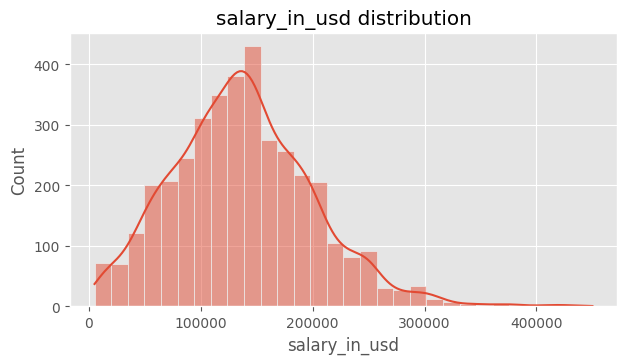

In [25]:
exp_cols = ["salary_in_usd"]
plt.figure(figsize=(12,10))
for i, column in enumerate(exp_cols):
    plt.subplot(3,2, i+1)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.tight_layout()

# **Feature Relationships**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   object
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   remote_ratio        3755 non-null   object
 6   company_size        3755 non-null   object
 7   residence_location  3755 non-null   object
 8   Job_Group           3755 non-null   object
dtypes: int64(1), object(8)
memory usage: 264.1+ KB


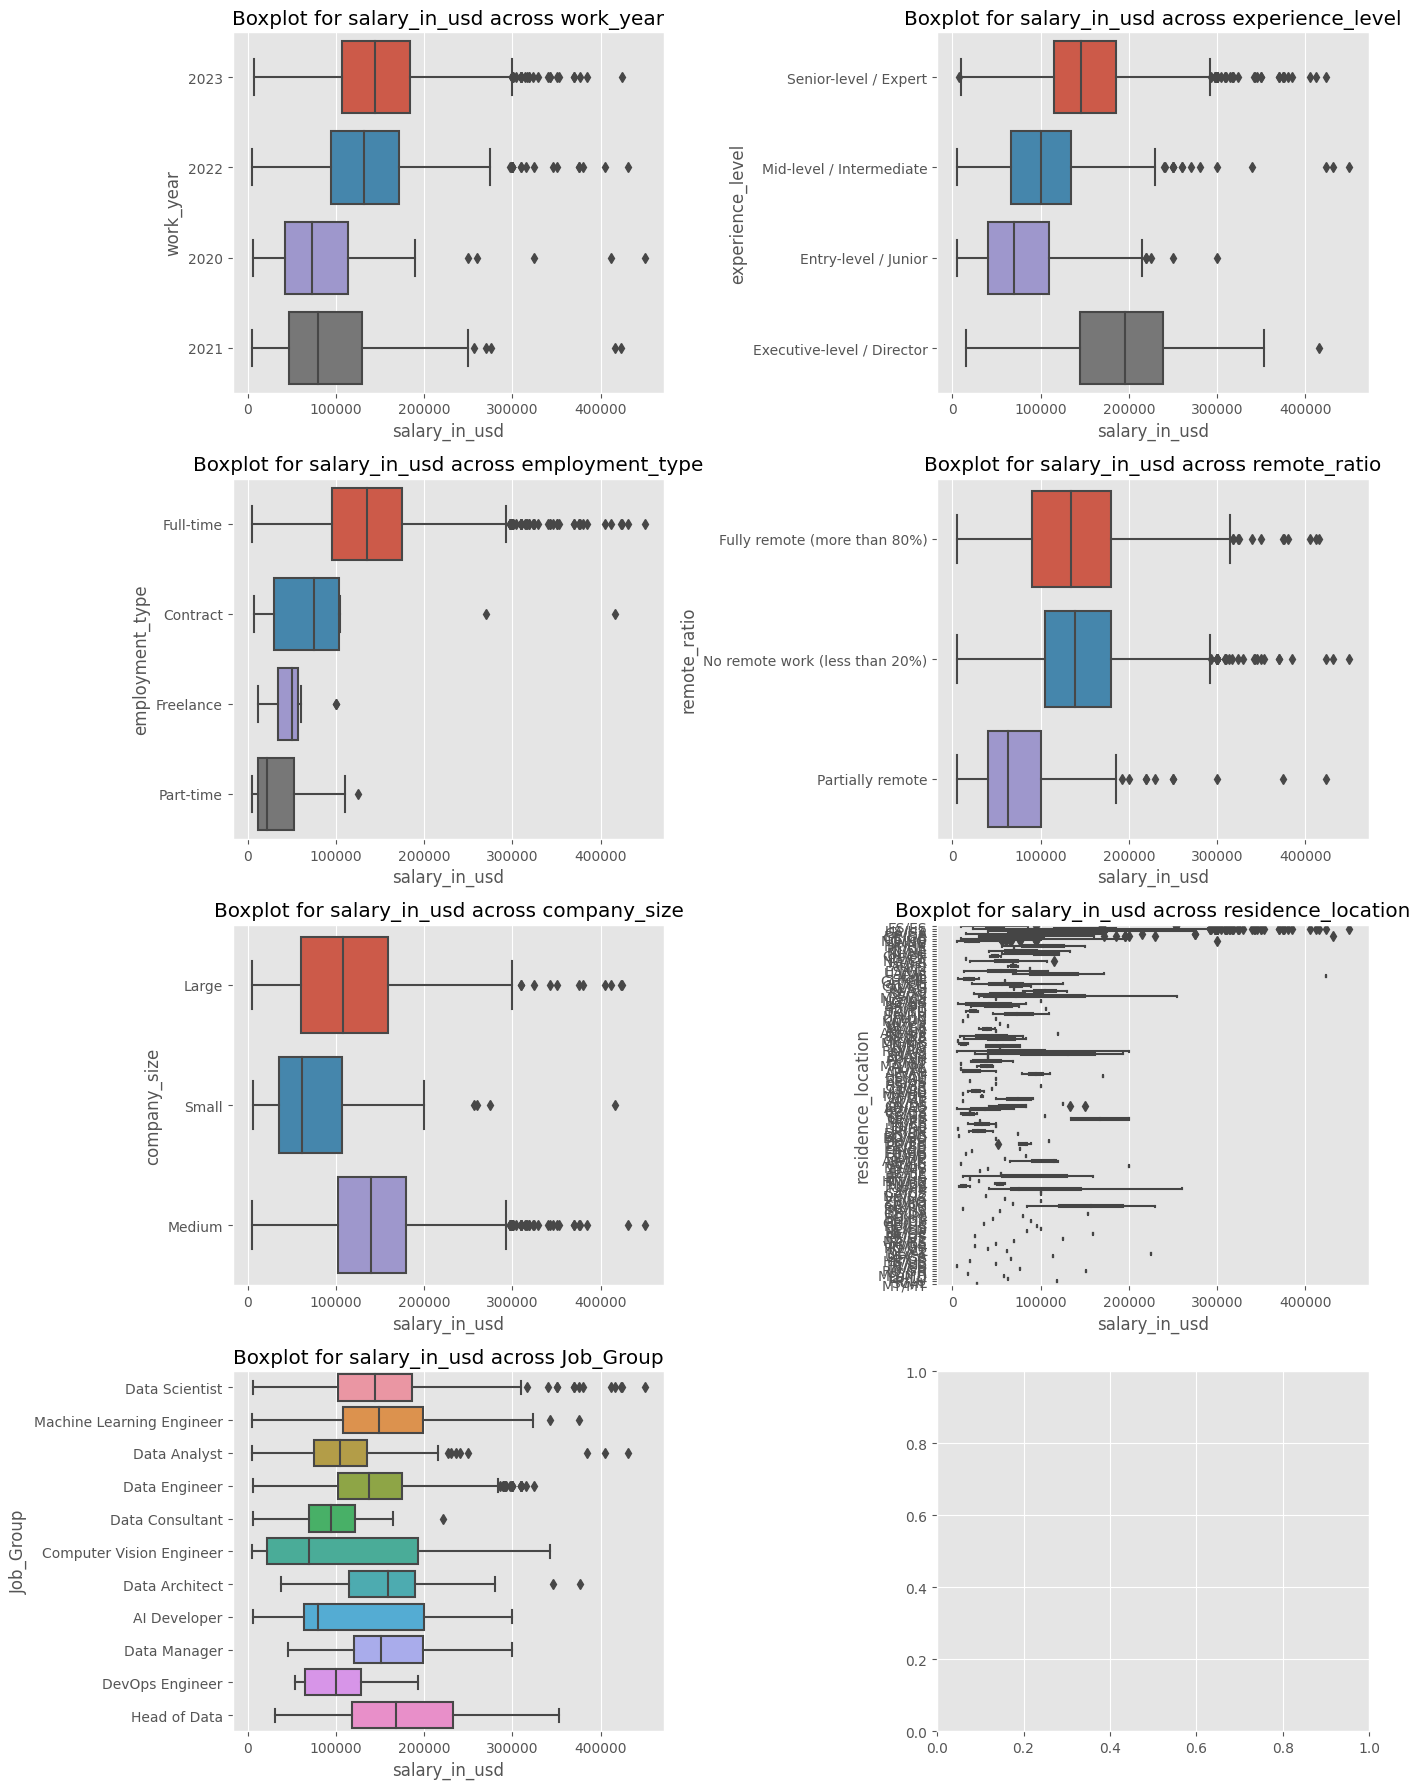

In [27]:
vars = ['work_year',
        'experience_level',
        'employment_type',
        'remote_ratio',
        'company_size',
        'residence_location',
        'Job_Group']

# Set the number of columns and rows for the subplot grid
num_columns = 2
num_rows = (len(vars) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, 18))

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Iterate through each categorical variable in the 'vars' list
for i, (cat_var, ax) in enumerate(zip(vars, axes), start=1):
    # Create a horizontal boxplot for the current categorical variable in the current subplot
    sns.boxplot(x='salary_in_usd', y=cat_var, data=df, ax=ax)
    
    ax.set_title(f'Boxplot for salary_in_usd across {cat_var}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# **Ask questions about the data**

**1. How does job experience relate to salary in the data science field?**

This question aims to analyze the correlation between the number of experience and the corresponding salaries. It can reveal trends such as whether salaries increase linearly with experience or if there are certain experience thresholds that significantly impact compensation.


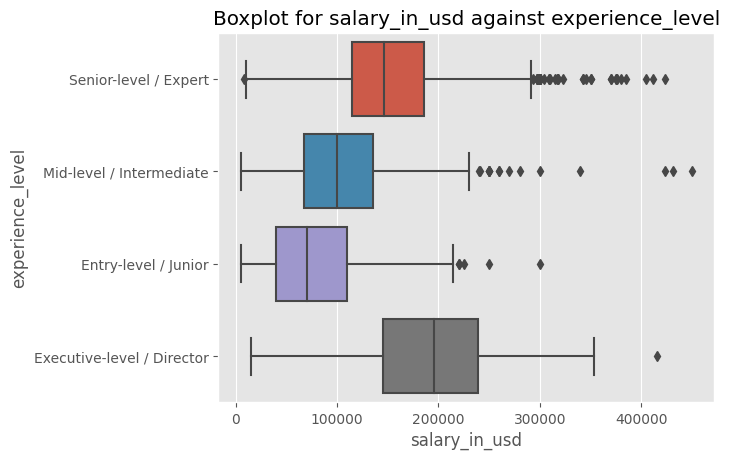

In [28]:
sns.boxplot(x='salary_in_usd', y='experience_level', data=df)
plt.title('Boxplot for salary_in_usd against experience_level')
plt.show()

In the presented box plot analysis, we explored the relationship between different experience levels and corresponding salary ranges. 
* The experience levels were categorized as follows: 'EN' for Entry-level/Junior, 'MI' for Mid-level/Intermediate, 'SE' for Senior-level/Expert, and 'EX' for Executive-level/Director.
* The box plot vividly illustrates the substantial influence of experience levels on 'salary_in_usd.' As expected, the box plot clearly shows a positive correlation between experience levels and salary. Higher experience levels, such as Senior-level/Expert and Executive-level/Director, exhibit higher median salaries and broader salary ranges compared to Entry-level/Junior and Mid-level/Intermediate roles.


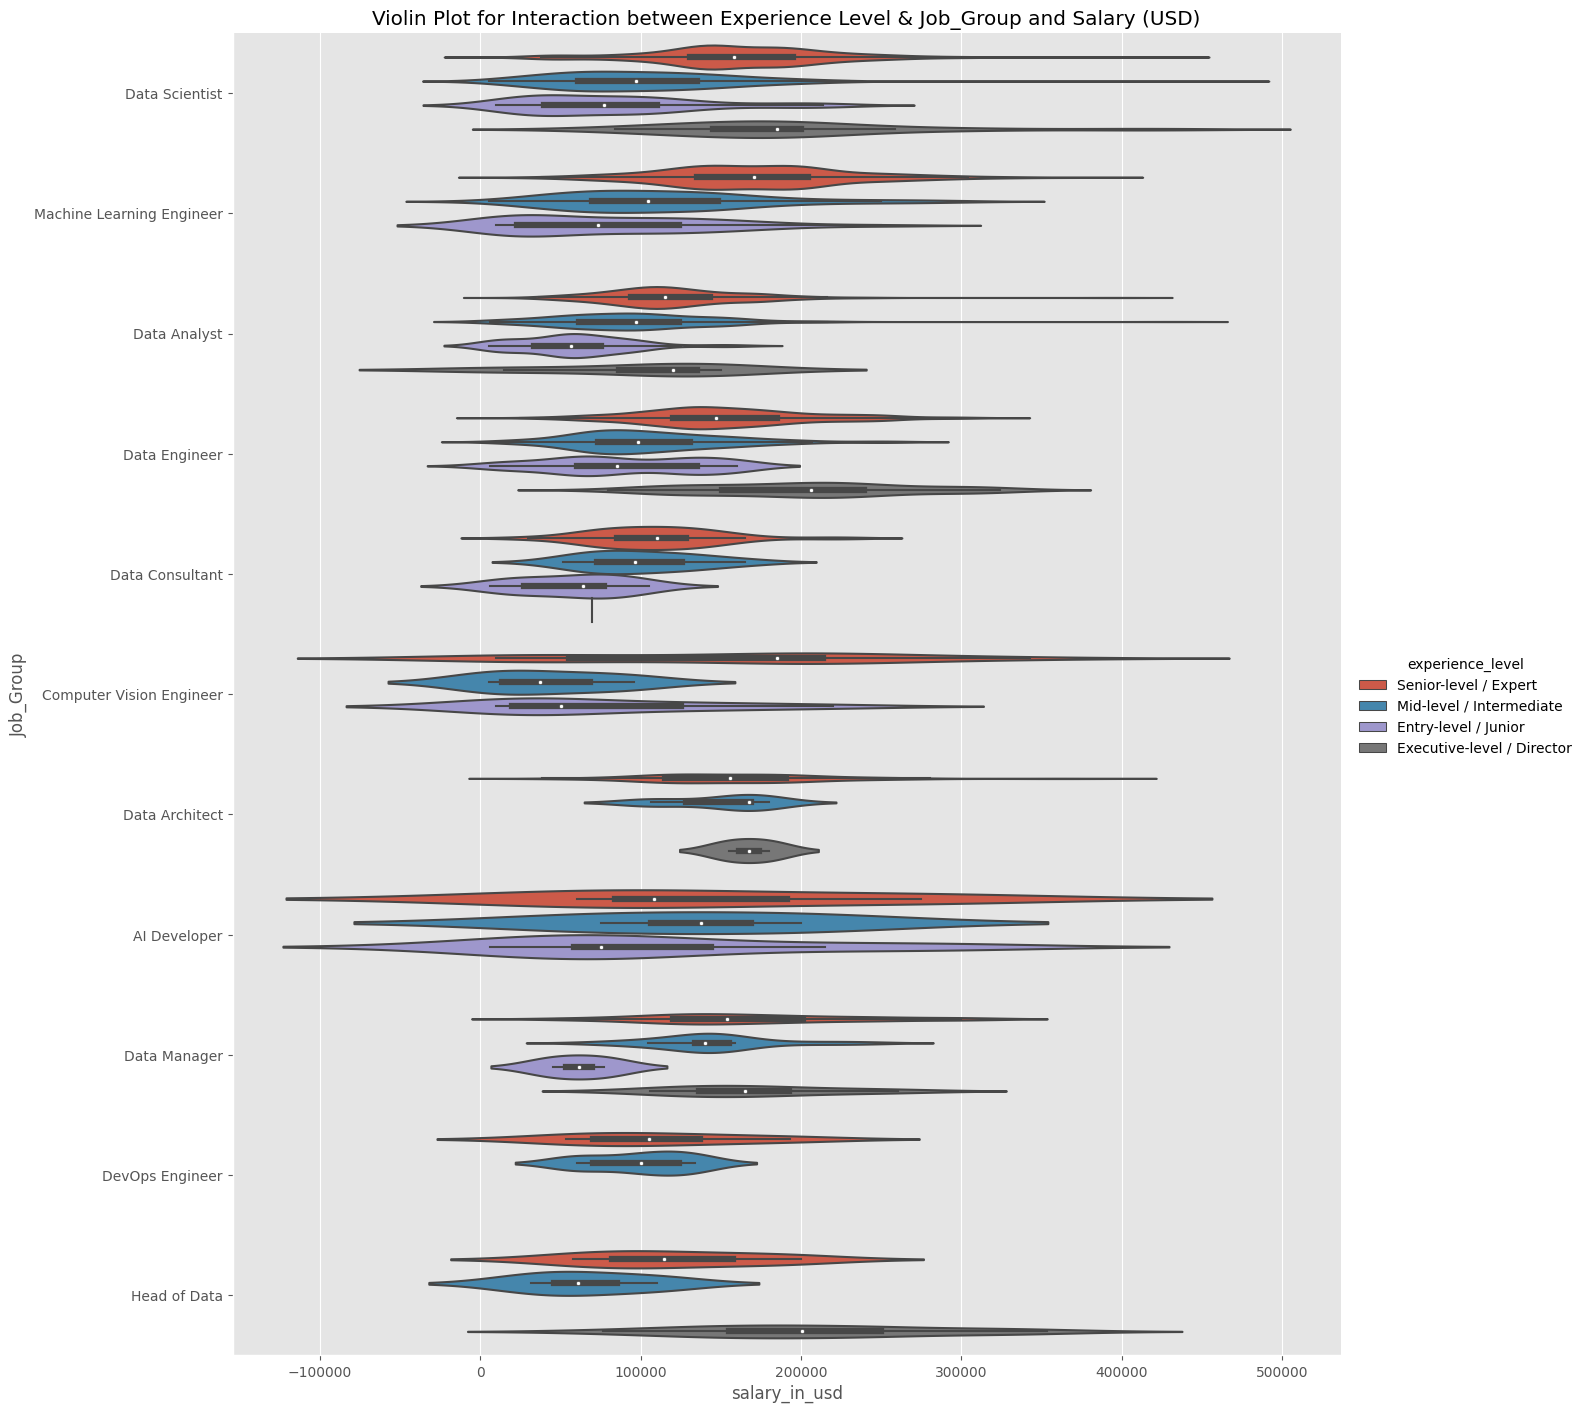

In [29]:
sns.catplot(x='salary_in_usd', y='Job_Group', hue='experience_level', kind='violin', data=df, height=14, aspect=1)
plt.title('Violin Plot for Interaction between Experience Level & Job_Group and Salary (USD)')
plt.show()

**2. What is the distribution of salaries across different employment types in data science roles?**

This question focuses on understanding the salary distribution based on employment types (employment_type). It could help uncover whether certain types of employment, such as full-time, part-time, or contract positions, are associated with higher or lower salaries in the data science domain.


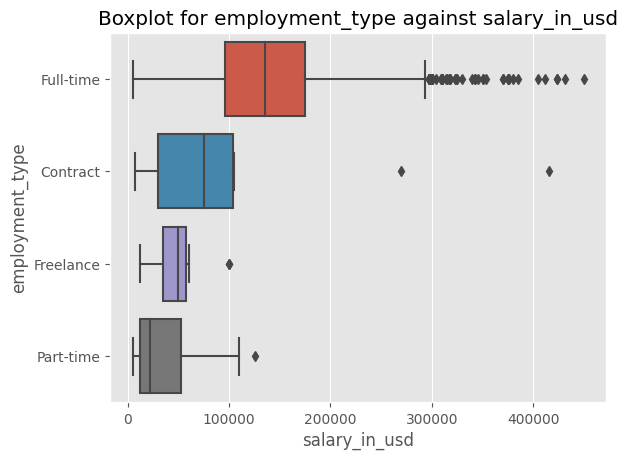

In [30]:
sns.boxplot(x='salary_in_usd', y='employment_type', data=df)
plt.title('Boxplot for employment_type against salary_in_usd')
plt.show()

* It is quite clear from the boxplot that Full-time employment are associated with higher salaries than the other categories

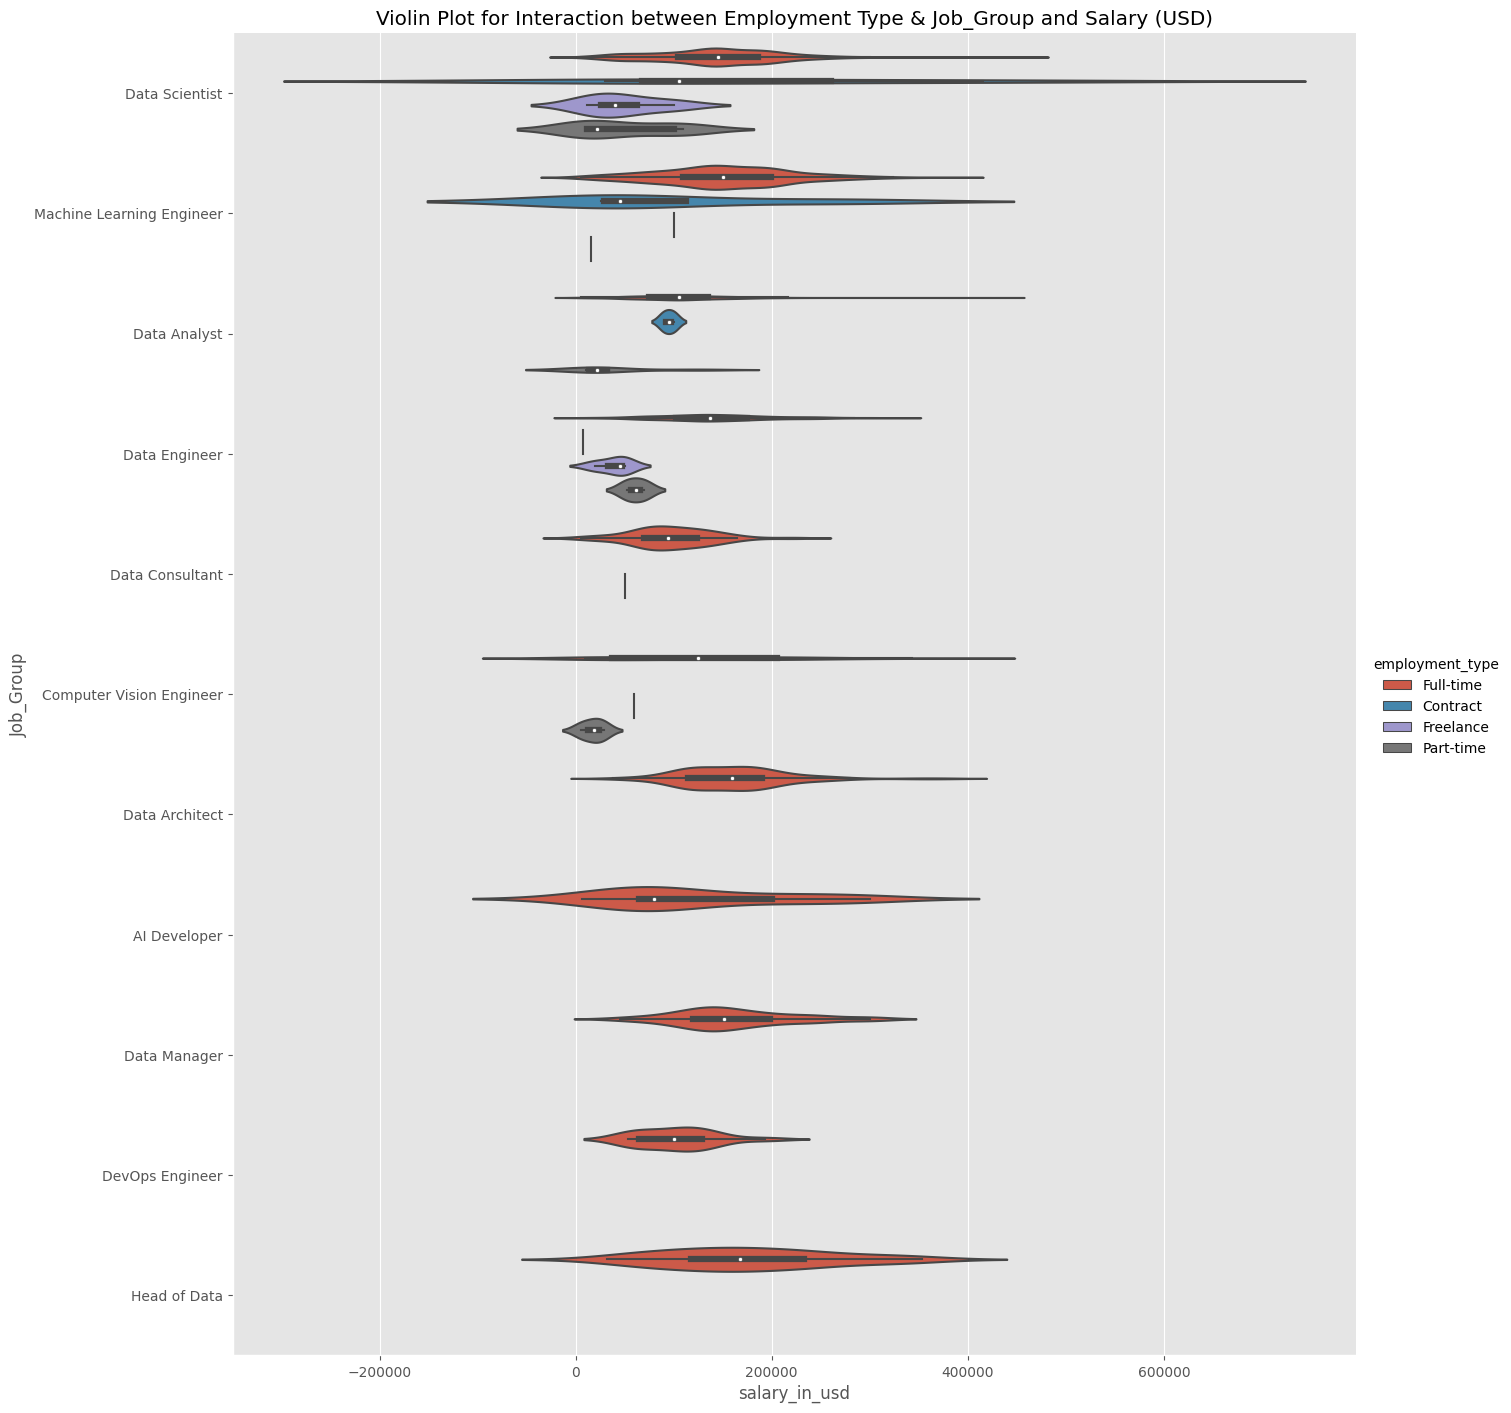

In [31]:
sns.catplot(x='salary_in_usd', y='Job_Group', hue='employment_type', kind='violin', data=df, height=14, aspect=1)
plt.title('Violin Plot for Interaction between Employment Type & Job_Group and Salary (USD)')
plt.show()

**3. How does the company size impact data science salaries, and is there a correlation with remote work opportunities?**

Exploring the relationship between company size (Company_size) and data science salaries can provide insights into whether larger or smaller companies tend to offer more competitive compensation. Additionally, analyzing the remote work ratio (remote_ratio) in correlation with salaries can shed light on whether companies offering remote work options pay differently compared to those with more traditional office setups.

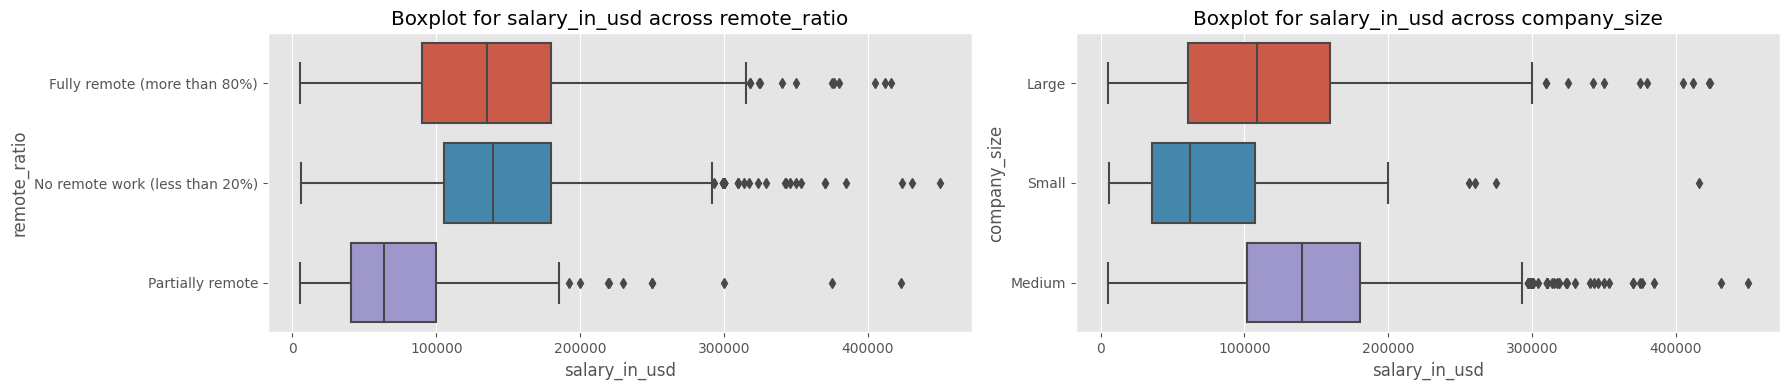

In [32]:
vars_1 = ['remote_ratio',
        'company_size'
        ]

# Set the number of columns and rows for the subplot grid
num_columns = 2
num_rows = (len(vars_1) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 4))

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Iterate through each categorical variable in the 'vars' list
for i, (cat_var, ax) in enumerate(zip(vars_1, axes), start=1):
    # Create a horizontal boxplot for the current categorical variable in the current subplot
    sns.boxplot(x='salary_in_usd', y=cat_var, data=df, ax=ax)
    
    ax.set_title(f'Boxplot for salary_in_usd across {cat_var}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

* Interestingly Medium sized companies seems to pay more than Large and Small companies
* Partially Remote work seems to receive lower pay than the other categories

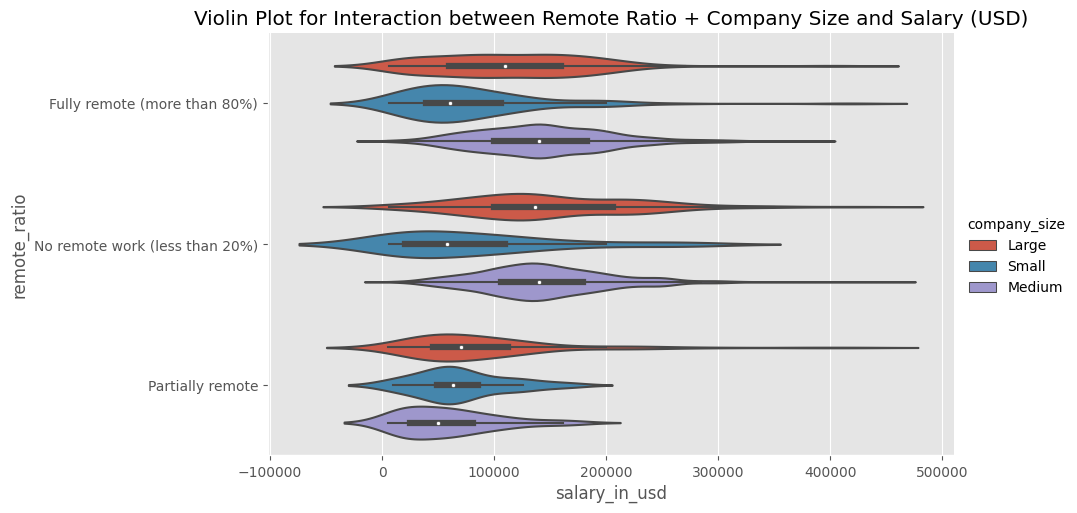

In [33]:
sns.catplot(x='salary_in_usd', y='remote_ratio', hue='company_size', kind='violin', data=df, height=5, aspect=2)
plt.title('Violin Plot for Interaction between Remote Ratio + Company Size and Salary (USD)')
plt.show()